In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


train_idx = np.where((y_train == 3) | (y_train == 5))[0]
test_idx = np.where((y_test == 3) | (y_test == 5))[0]

x_train, y_train = x_train[train_idx], y_train[train_idx]
x_test, y_test = x_test[test_idx], y_test[test_idx]


y_train = (y_train == 5).astype(int)
y_test = (y_test == 5).astype(int)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:

x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ⚙️ Step 6: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# 🚂 Step 7: Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5581 - loss: 0.6812 - val_accuracy: 0.6210 - val_loss: 0.6428
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6750 - loss: 0.6074 - val_accuracy: 0.6870 - val_loss: 0.5854
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7068 - loss: 0.5617 - val_accuracy: 0.6975 - val_loss: 0.5774
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7228 - loss: 0.5456 - val_accuracy: 0.7275 - val_loss: 0.5265
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7530 - loss: 0.5110 - val_accuracy: 0.7255 - val_loss: 0.5311
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7752 - loss: 0.4687 - val_accuracy: 0.7425 - val_loss: 0.5213
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7872 - loss: 0.4474 - val_accuracy: 0.7405 - val_loss: 0.5131
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8083 - loss: 0.4070 - val_accuracy: 0

In [ ]:
# 💾 Step 8: Save the trained model
model.save("cat_dog_simple_cnn.h5")


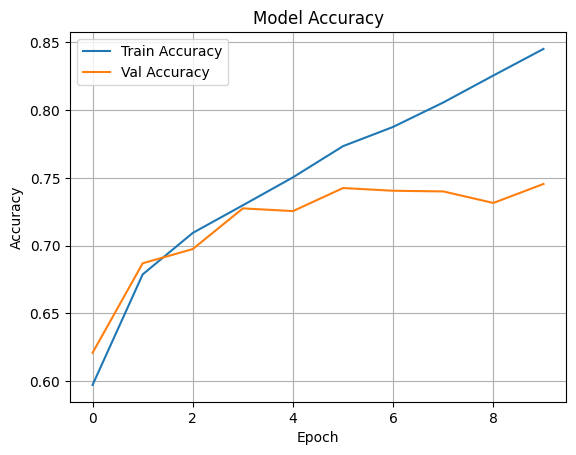

In [ ]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted: Cat


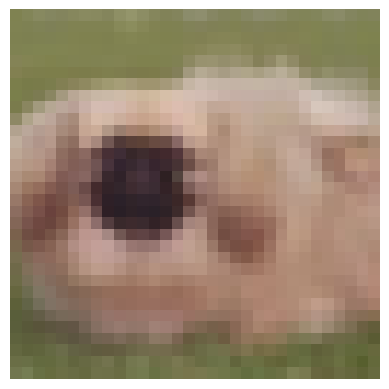

In [ ]:

class_names = ["Cat", "Dog"]

index = 5
img = x_test[index]
plt.imshow(img)
plt.axis('off')

prediction = model.predict(np.expand_dims(img, axis=0))[0][0]
predicted_class = "Dog" if prediction > 0.5 else "Cat"
print(f"Predicted: {predicted_class}")


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
# Download CSV
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv -O diabetes.csv


--2025-07-18 06:11:27--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  22.73K  --.-KB/s    in 0.001s  

2025-07-18 06:11:27 (15.2 MB/s) - ‘diabetes.csv’ saved [23278/23278]



In [ ]:
# Load dataset
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv('diabetes.csv', names=columns)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Reshape for CNN input: (samples, 2, 4, 1) from 8 features
X_reshaped = X_scaled.reshape(-1, 2, 4, 1)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(2, 4, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(3, 3, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


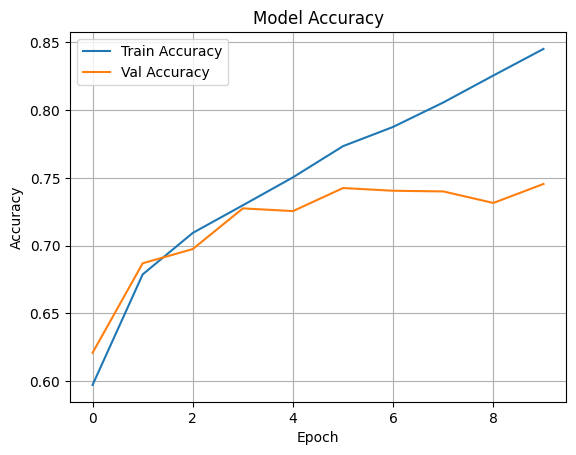

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Reshape for CNN: (samples, 2, 4, 1) from 8 features
X_reshaped = X_scaled.reshape(-1, 2, 4, 1)

# ✅ Split after reshaping
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)


In [ ]:
sample = X_test[0].reshape(1, 2, 4, 1)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(2, 4, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Predict from the test set
sample = X_test[0].reshape(1, 2, 4, 1)
prediction = model.predict(sample)[0][0]

if prediction > 0.5:
    print("🚨 The person is likely to have **diabetes**.")
else:
    print("✅ The person is **not likely** to have diabetes.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
🚨 The person is likely to have **diabetes**.


In [ ]:
# Example: Manual input
# Format: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
user_input = [[2, 120, 70, 30, 80, 25.0, 0.5, 24]]  # Change this to actual values

# Scale and reshape it
user_scaled = scaler.transform(user_input)
user_reshaped = user_scaled.reshape(1, 2, 4, 1)

# Predict
prediction = model.predict(user_reshaped)[0][0]

# Output result
if prediction > 0.5:
    print("🚨 Based on the model, the person is likely to have **diabetes**.")
else:
    print("✅ Based on the model, the person is **not likely** to have diabetes.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
🚨 Based on the model, the person is likely to have **diabetes**.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv -O diabetes.csv


--2025-07-18 06:25:49--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  22.73K  --.-KB/s    in 0.002s  

2025-07-18 06:25:49 (13.3 MB/s) - ‘diabetes.csv’ saved [23278/23278]



In [ ]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv('diabetes.csv', names=columns)


In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_reshaped = X_scaled.reshape(-1, 2, 4, 1)  # CNN needs 4D input


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(2, 4, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.6080 - loss: 0.6719 - val_accuracy: 0.7403 - val_loss: 0.5964
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7527 - loss: 0.5709 - val_accuracy: 0.7597 - val_loss: 0.5297
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7776 - loss: 0.5080 - val_accuracy: 0.7727 - val_loss: 0.4980
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7757 - loss: 0.4722 - val_accuracy: 0.7597 - val_loss: 0.4937
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7664 - loss: 0.4718 - val_accuracy: 0.7662 - val_loss: 0.4962
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7671 - loss: 0.4574 - val_accuracy: 0.7662 - val_loss: 0.5007
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7820 - loss: 0.4549 - val_accuracy: 0.7662 - val_loss: 0.5070
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7933 - loss: 0.4322 - val_accuracy: 0.7662 - val_loss

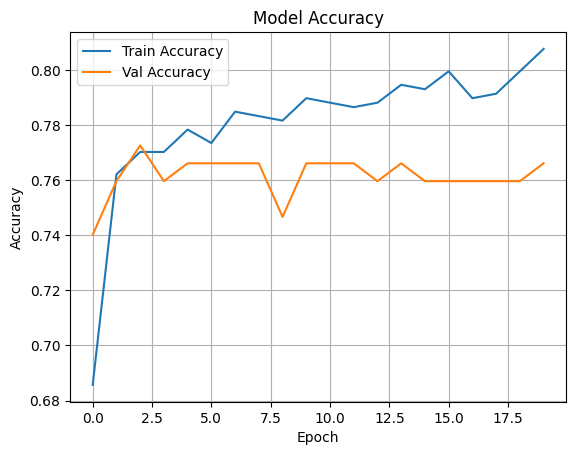

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [ ]:
sample = X_test[0].reshape(1, 2, 4, 1)
prediction = model.predict(sample)[0][0]

if prediction > 0.5:
    print("Person is likely diabetic")
else:
    print("Person is not diabetic")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Person is not diabetic


In [ ]:
user_input = [[2, 120, 70, 30, 80, 25.0, 0.5, 24]]
user_scaled = scaler.transform(user_input)
user_reshaped = user_scaled.reshape(1, 2, 4, 1)
prediction = model.predict(user_reshaped)[0][0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
sample = X_test[0].reshape(1, 2, 4, 1)
prediction = model.predict(sample)[0][0]

if prediction > 0.5:
    print("Person is likely diabetic")
else:
    print("Person is not diabetic")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Person is not diabetic
